Description: In this assginment, I explored the census dataset from Social Explorer about age in the Los Angeles County. Age is one of the most important indicators when we discuss wildfire vulnerability. I want visualize the age in the Los Angeles county to see where is more socio-economically vulnerable.

# Load the dataset

In [169]:
import pandas as pd
import geopandas as gpd

In [170]:
df = pd.read_csv('R13567817_SL140.csv')
df

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,PCT_SE_A01001_004,PCT_SE_A01001_005,PCT_SE_A01001_006,PCT_SE_A01001_007,PCT_SE_A01001_008,PCT_SE_A01001_009,PCT_SE_A01001_010,PCT_SE_A01001_011,PCT_SE_A01001_012,PCT_SE_A01001_013
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,4.98,2.99,7.47,13.33,13.28,15.77,14.40,15.02,5.06,0.85
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,5.81,2.79,8.81,6.80,10.88,16.43,19.28,12.27,5.98,3.58
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,6.15,1.67,9.34,13.07,11.98,17.95,14.19,9.74,5.49,1.12
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,6.23,3.94,10.12,11.69,16.72,11.61,11.87,11.24,3.43,4.85
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,7.26,1.32,7.34,20.66,9.44,18.23,9.76,9.47,4.38,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,6037980038,"Census Tract 9800.38, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2494,6037980039,"Census Tract 9800.39, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2495,6037990100,"Census Tract 9901, Los Angeles County, California",ca,140,0,NaN,NaN,NaN,6,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2496,6037990200,"Census Tract 9902, Los Angeles County, California",ca,140,0,NaN,NaN,NaN,6,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check the basic info of the dataset

In [171]:
# determine the data type
type(df)

pandas.core.frame.DataFrame

In [173]:
# total rows and columns in the dataset
df.shape

(2498, 70)

In [174]:
# show the first 5 rows of the data
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,PCT_SE_A01001_004,PCT_SE_A01001_005,PCT_SE_A01001_006,PCT_SE_A01001_007,PCT_SE_A01001_008,PCT_SE_A01001_009,PCT_SE_A01001_010,PCT_SE_A01001_011,PCT_SE_A01001_012,PCT_SE_A01001_013
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,4.98,2.99,7.47,13.33,13.28,15.77,14.40,15.02,5.06,0.85
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,5.81,2.79,8.81,6.80,10.88,16.43,19.28,12.27,5.98,3.58
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,6.15,1.67,9.34,13.07,11.98,17.95,14.19,9.74,5.49,1.12
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,6.23,3.94,10.12,11.69,16.72,11.61,11.87,11.24,3.43,4.85
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,7.26,1.32,7.34,20.66,9.44,18.23,9.76,9.47,4.38,2.49


In [175]:
# show data type for each column
df.dtypes

Geo_FIPS               int64
Geo_QName             object
Geo_STUSAB            object
Geo_SUMLEV             int64
Geo_GEOCOMP            int64
                      ...   
PCT_SE_A01001_009    float64
PCT_SE_A01001_010    float64
PCT_SE_A01001_011    float64
PCT_SE_A01001_012    float64
PCT_SE_A01001_013    float64
Length: 70, dtype: object

In [176]:
# look data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   int64  
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   int64  
 9   Geo_COUNTY         2498 non-null   int64  
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [15]:
# check FIPS data
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

In [16]:
# check state code data
df.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [177]:
# Check county code data
df.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

In [178]:
# Convert FIPS, STATE, and COUNTY to string
df2 = pd.read_csv(
    'R13567817_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [179]:
# Check new df2
df2.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,PCT_SE_A01001_004,PCT_SE_A01001_005,PCT_SE_A01001_006,PCT_SE_A01001_007,PCT_SE_A01001_008,PCT_SE_A01001_009,PCT_SE_A01001_010,PCT_SE_A01001_011,PCT_SE_A01001_012,PCT_SE_A01001_013
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,4.98,2.99,7.47,13.33,13.28,15.77,14.40,15.02,5.06,0.85
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,5.81,2.79,8.81,6.80,10.88,16.43,19.28,12.27,5.98,3.58
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,6.15,1.67,9.34,13.07,11.98,17.95,14.19,9.74,5.49,1.12
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,6.23,3.94,10.12,11.69,16.72,11.61,11.87,11.24,3.43,4.85
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,7.26,1.32,7.34,20.66,9.44,18.23,9.76,9.47,4.38,2.49


In [180]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [29]:
df2.columns[df2.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [181]:
df3 = df2.dropna(axis=1,how="all")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_STATE          2498 non-null   object 
 6   Geo_COUNTY         2498 non-null   object 
 7   Geo_TRACT          2498 non-null   int64  
 8   Geo_NAME           2498 non-null   object 
 9   SE_A01001_001      2498 non-null   int64  
 10  SE_A01001_002      2498 non-null   int64  
 11  SE_A01001_003      2498 non-null   int64  
 12  SE_A01001_004      2498 non-null   int64  
 13  SE_A01001_005      2498 non-null   int64  
 14  SE_A01001_006      2498 non-null   int64  
 15  SE_A01001_007      2498 non-null   int64  
 16  SE_A01001_008      2498 

In [205]:
# Check new df3
df3.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_NAME,SE_A01001_001,...,PCT_SE_A01001_004,PCT_SE_A01001_005,PCT_SE_A01001_006,PCT_SE_A01001_007,PCT_SE_A01001_008,PCT_SE_A01001_009,PCT_SE_A01001_010,PCT_SE_A01001_011,PCT_SE_A01001_012,PCT_SE_A01001_013
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,Census Tract 1011.10,4014,...,4.98,2.99,7.47,13.33,13.28,15.77,14.40,15.02,5.06,0.85
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,Census Tract 1011.22,4164,...,5.81,2.79,8.81,6.80,10.88,16.43,19.28,12.27,5.98,3.58
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,Census Tract 1012.20,3481,...,6.15,1.67,9.34,13.07,11.98,17.95,14.19,9.74,5.49,1.12
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,Census Tract 1012.21,3756,...,6.23,3.94,10.12,11.69,16.72,11.61,11.87,11.24,3.43,4.85
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,Census Tract 1012.22,2808,...,7.26,1.32,7.34,20.66,9.44,18.23,9.76,9.47,4.38,2.49


# Prepare for Plotting

In [206]:
# Collumns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A01001_001',
                   'SE_A01001_002',
                   'SE_A01001_003',
                   'SE_A01001_004',
                   'SE_A01001_005',
                   'SE_A01001_006',
                   'SE_A01001_007',
                   'SE_A01001_008',
                   'SE_A01001_009',
                   'SE_A01001_010',
                   'SE_A01001_011',
                   'SE_A01001_012',
                   'SE_A01001_013']

In [207]:
df4 = df[columns_to_keep]
df4.head()

,Geo_FIPS,SE_A01001_001,SE_A01001_002,SE_A01001_003,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013
0,6037101110,4014,141,134,200,120,300,535,533,633,578,603,203,34
1,6037101122,4164,128,179,242,116,367,283,453,684,803,511,249,149
2,6037101220,3481,135,189,214,58,325,455,417,625,494,339,191,39
3,6037101221,3756,154,158,234,148,380,439,628,436,446,422,129,182
4,6037101222,2808,28,243,204,37,206,580,265,512,274,266,123,70


In [208]:
columns = list(df4) 
columns

['Geo_FIPS',
 'SE_A01001_001',
 'SE_A01001_002',
 'SE_A01001_003',
 'SE_A01001_004',
 'SE_A01001_005',
 'SE_A01001_006',
 'SE_A01001_007',
 'SE_A01001_008',
 'SE_A01001_009',
 'SE_A01001_010',
 'SE_A01001_011',
 'SE_A01001_012',
 'SE_A01001_013']

In [209]:
#Rename collumns
df4.columns = ['FIPS',
                   'Total Population',
                   'Under 5 Years',
                   '5 to 9 Years',
                   '10 to 14 Years',
                   '10 to 14 Years',
                   '18 to 24 Years',
                   '25 to 34 Years',
                   '35 to 44 Years',
                   '45 to 54 Years',
                   '55 to 64 Years',
                   '65 to 74 Years',
                   '75 to 84 Years',
                   '85 Years and Over']

In [187]:
df4.head()

,FIPS,Total Population,Under 5 Years,5 to 9 Years,10 to 14 Years,10 to 14 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over
0,6037101110,4014,141,134,200,120,300,535,533,633,578,603,203,34
1,6037101122,4164,128,179,242,116,367,283,453,684,803,511,249,149
2,6037101220,3481,135,189,214,58,325,455,417,625,494,339,191,39
3,6037101221,3756,154,158,234,148,380,439,628,436,446,422,129,182
4,6037101222,2808,28,243,204,37,206,580,265,512,274,266,123,70


# Plotting

In [188]:
# Filter the "85 years and over" data
df4['85 Years and Over'].head()

0     34
1    149
2     39
3    182
4     70
Name: 85 Years and Over, dtype: int64

In [190]:
# Check the descriptive data & plot
df4['85 Years and Over'].describe()

count    2498.000000
mean       76.841073
std        73.065981
min         0.000000
25%        26.000000
50%        56.000000
75%       106.000000
max       604.000000
Name: 85 Years and Over, dtype: float64

<Axes: ylabel='Frequency'>

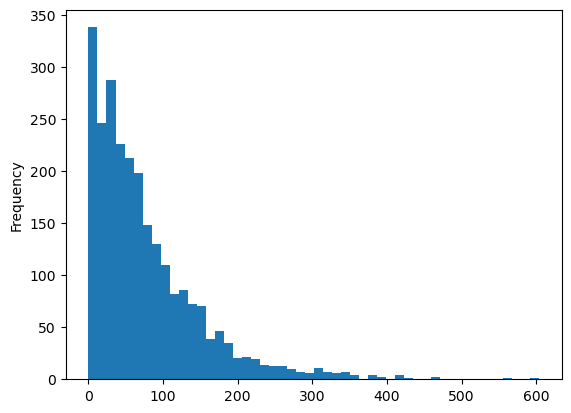

In [191]:
df4['85 Years and Over'].plot.hist(bins=50)

<Axes: >

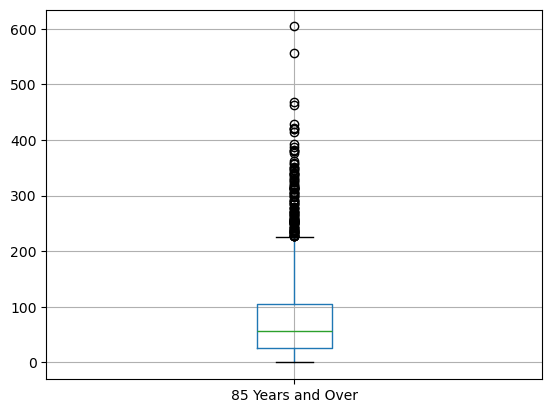

In [192]:
df4.boxplot(column=['85 Years and Over'])

In [193]:
df_sorted = df4.sort_values(by='85 Years and Over',ascending = False)

<Axes: xlabel='FIPS'>

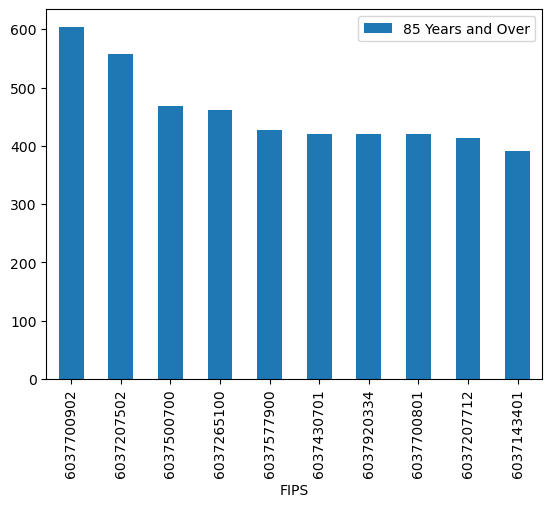

In [194]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='85 Years and Over'
                          )

<Axes: title={'center': 'Top 10 Census Tracts with Highest Population of Older Adults ≥ 85 years old in Los Angeles County in 2022'}, ylabel='FIPS'>

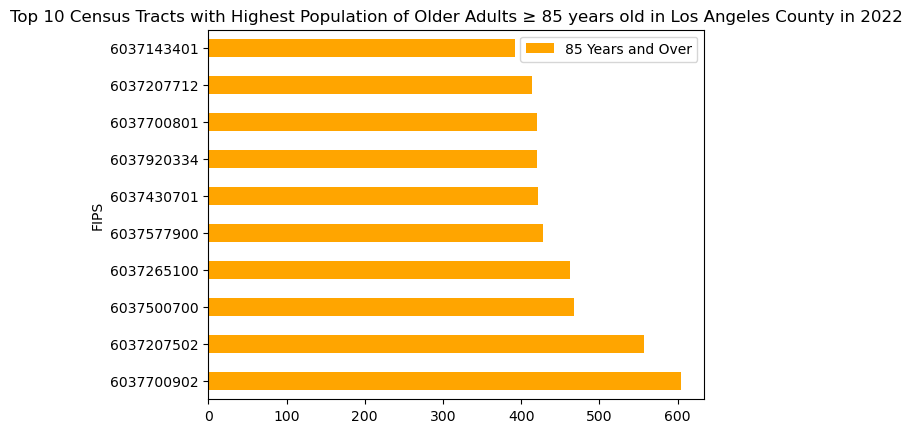

In [195]:
df_sorted.head(10).plot.barh(x='FIPS',
                            y='85 Years and Over', 
                            title='Top 10 Census Tracts with Highest Population of Older Adults ≥ 85 years old in Los Angeles County in 2022',
                            color='orange')

In [70]:
# subset the data
df4[df4['85 Years and Over']==0]

,FIPS,Total Population,Under 5 Years,5 to 9 Years,10 to 14 Years,10 to 14 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over
51,6037106408,3733,475,317,436,139,437,661,480,388,251,100,49,0
90,6037111304,3106,261,52,19,76,256,1126,488,320,212,237,59,0
114,6037113427,2360,162,216,236,36,113,327,565,427,165,85,28,0
117,6037115103,2725,0,0,0,30,2512,145,30,8,0,0,0,0
136,6037117407,3566,366,410,210,217,406,602,515,441,215,184,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,6037980038,0,0,0,0,0,0,0,0,0,0,0,0,0
2494,6037980039,0,0,0,0,0,0,0,0,0,0,0,0,0
2495,6037990100,0,0,0,0,0,0,0,0,0,0,0,0,0
2496,6037990200,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
# Create a new variable for census tracts with zero 
df5 = df4[df4['85 Years and Over']==0]
df5.head()

,FIPS,Total Population,Under 5 Years,5 to 9 Years,10 to 14 Years,10 to 14 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over
51,6037106408,3733,475,317,436,139,437,661,480,388,251,100,49,0
90,6037111304,3106,261,52,19,76,256,1126,488,320,212,237,59,0
114,6037113427,2360,162,216,236,36,113,327,565,427,165,85,28,0
117,6037115103,2725,0,0,0,30,2512,145,30,8,0,0,0,0
136,6037117407,3566,366,410,210,217,406,602,515,441,215,184,0,0


In [197]:
print('There are ' + str(len(df5)) + ' census tracts with no older adults ≥ 85 years old in them')

There are 171 census tracts with no older adults ≥ 85 years old in them


In [198]:
df5[['FIPS','85 Years and Over']]

,FIPS,85 Years and Over
51,6037106408,0
90,6037111304,0
114,6037113427,0
117,6037115103,0
136,6037117407,0
...,...,...
2493,6037980038,0
2494,6037980039,0
2495,6037990100,0
2496,6037990200,0


# Mapping

In [199]:
# read in a geojson file 
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

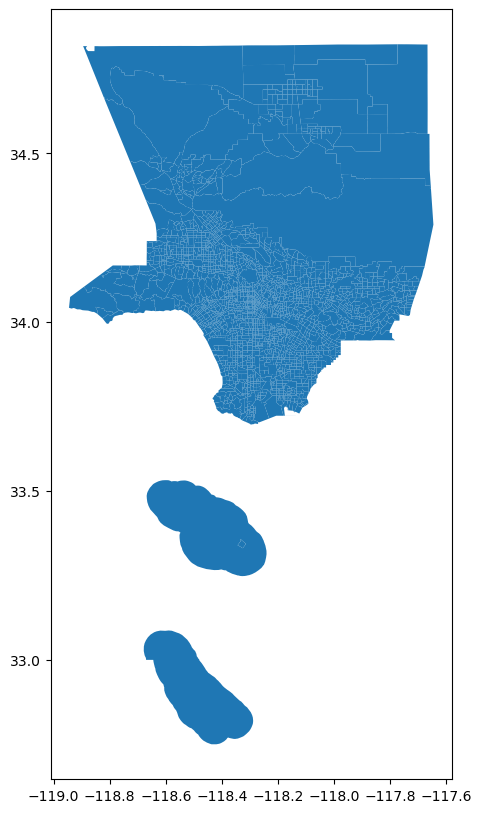

In [163]:
# plot it
tracts.plot(figsize=(12,10))

In [200]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [201]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [202]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [167]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [204]:
df4.head()

,FIPS,Total Population,Under 5 Years,5 to 9 Years,10 to 14 Years,10 to 14 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over
0,6037101110,4014,141,134,200,120,300,535,533,633,578,603,203,34
1,6037101122,4164,128,179,242,116,367,283,453,684,803,511,249,149
2,6037101220,3481,135,189,214,58,325,455,417,625,494,339,191,39
3,6037101221,3756,154,158,234,148,380,439,628,436,446,422,129,182
4,6037101222,2808,28,243,204,37,206,580,265,512,274,266,123,70


In [215]:
df6 = pd.DataFrame({
    'FIPS'})

In [223]:
df4['FIPS'] = df4['FIPS'].astype(str).str.pad(width=11, side='left', fillchar='0')

/tmp/ipykernel_427/3652780038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['FIPS'] = df4['FIPS'].astype(str).str.pad(width=11, side='left', fillchar='0')


In [224]:
df4.head()

,FIPS,Total Population,Under 5 Years,5 to 9 Years,10 to 14 Years,10 to 14 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over
0,06037101110,4014,141,134,200,120,300,535,533,633,578,603,203,34
1,06037101122,4164,128,179,242,116,367,283,453,684,803,511,249,149
2,06037101220,3481,135,189,214,58,325,455,417,625,494,339,191,39
3,06037101221,3756,154,158,234,148,380,439,628,436,446,422,129,182
4,06037101222,2808,28,243,204,37,206,580,265,512,274,266,123,70


In [225]:
tracts_age = tracts.merge(df4, on="FIPS")

In [226]:
tracts_age.head()

,CT20,geometry,FIPS,Total Population,Under 5 Years,5 to 9 Years,10 to 14 Years,10 to 14 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,4014,141,134,200,120,300,535,533,633,578,603,203,34
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,4164,128,179,242,116,367,283,453,684,803,511,249,149
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3481,135,189,214,58,325,455,417,625,494,339,191,39
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3756,154,158,234,148,380,439,628,436,446,422,129,182
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2808,28,243,204,37,206,580,265,512,274,266,123,70


<Axes: >

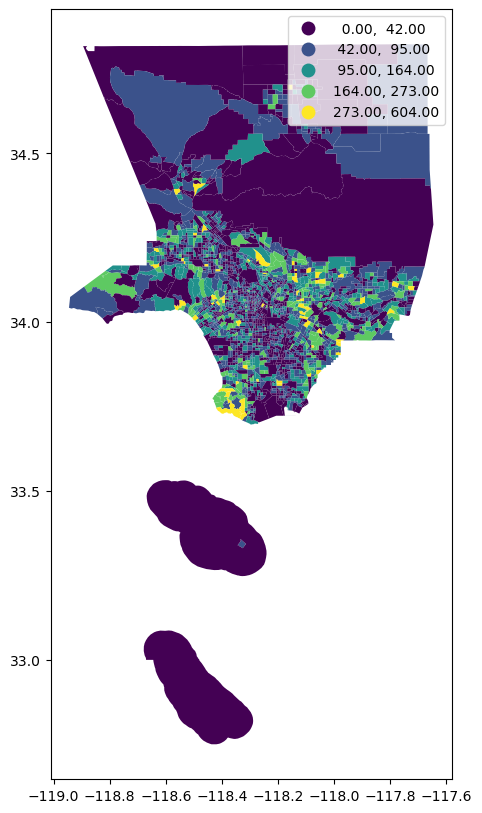

In [227]:
tracts_age.plot(figsize=(12,10),
                 column='85 Years and Over',
                 legend=True, 
                 scheme='NaturalBreaks')